# Filtrado de datos
Se filtrarán las columnas de "NOMBRE O RAZON SOCIAL DEL USUARIO","PERIODO DE CONCESION (MESES)","ACTIVIDAD ECONOMICA","VOLUMEN CAPTADO PARA EL AÑO REPORTADO (M3)","NOMBRE DE LA FUENTE","MICROCUENCA/SUBCUENCA/GRANCUENCA","TARIFA UNITARIA ANUAL DE LA TASA POR UTILIZACIÓN DE AGUA","VOLUMEN CONCESIONADO PARA EL AÑO REPORTADO (M3)"
# Tipos de datos
* Nombre o razon social del usuario: Nombre de la asociacion o quien la representa(variable cualitativa nominal)
* Periodo de concesion(meses): Indica el periodo,en meses, de la concesion para el uso de las fuentes hidricas(variable cuantitativa ordinal)
* Actividad economica: Ofrece informacion sobre el campo laboral donde se desempeña la empresa(variable cualitativa nominal)
* Volumen captado: Indica el volumen medido en 2018 en metros cubicos(variable cuantitativa ordinal)
* Nombre de la fuente: Provee informacion acerca de donde se toma el agua según la empresa(variable cualitativa nominal)
* Microcuenca/subcuenca/grancuenca: Da informacion mas detalla sobre la fuente, bien sea una micro,sub o gran cuenca(variable cualitativa nominal)
* Tarifa unitaria: Indica el cobro por metro cubico de agua captada(variable cuantitativa ordinal)
* Volumen concesionado: corresponde al volumen autorizado para la explotación, uso o aprovechamiento del recurso hídrico 

In [1]:
import pandas as pd
import statistics as stat
import matplotlib.pyplot as plot
import numpy as np
import scipy.stats as ss
import seaborn as sns
from sklearn.metrics import r2_score 

KeyboardInterrupt: 

In [ ]:
bd = pd.read_csv("CORPOBOYACA_INFORMACION_2018.csv",delimiter=',',low_memory=False)
bd

,ITEM,(1) NOMBRE O RAZON SOCIAL DEL USUARIO,(2) FECHA INICIO DEL PROGRAMA DE COBRO DE LA TASA,(3) RESOLUCION DE CONCESION Numero,(3) RESOLUCION DE CONCESION Fecha,(4) PERIODO DE CONCESION (MESES,ACTIVIDAD ECONOMICA,(6) CLASE DE MEDICION,(7) VOLUMEN CONCESIONADO PARA EL AÑO REPORTADO M3,(8) VOLUMEN CAPTADO PARA EL AÑO REPORTADO M3,...,(21) FACTOR REGIONAL (Tte y Alto),(21) FACTOR REGIONAL (Ac art'-' de entr y rec),(22) TARIFA UNITARIA ANUAL DE LA TASA POR UTILIZACIÓN DE AGUA (Dom),(22) TARIFA UNITARIA ANUAL DE LA TASA POR UTILIZACIÓN DE AGUA (Agr'-' gan'-' caza'-' silv y pesca'-'),(22) TARIFA UNITARIA ANUAL DE LA TASA POR UTILIZACIÓN DE AGUA (Ind Man),(22) TARIFA UNITARIA ANUAL DE LA TASA POR UTILIZACIÓN DE AGUA (Sum electricidad'-' gas'-' vap y aire acond'-'),(22) TARIFA UNITARIA ANUAL DE LA TASA POR UTILIZACIÓN DE AGUA (Expn de Min y Can),(22) TARIFA UNITARIA ANUAL DE LA TASA POR UTILIZACIÓN DE AGUA (Tte y Alto),(22) TARIFA UNITARIA ANUAL DE LA TASA POR UTILIZACIÓN DE AGUA (Ac art'-' de entr y rec),(23) VALOR A PAGAR USUARIO SUJETO PASIVO;;;;;;
0,1,ASESORIAS Y DISEÑOS SUAREZ Y CIA LTDA .,01/07/2018 12:00:00 AM,1029,04/16/2018 12:00:00 AM,60.0,Agricultura; ganadería; caza; silvicultura y p...,NINGUNO,69063.84,69063.84,...,0,0.0,0.00,1.84,0.00,0.0,0.0,0,0.0,127257;;;
1,2,ABAD BARRERA ALVARO JAIME,01/07/2018 12:00:00 AM,4094,12/17/2015 12:00:00 AM,120.0,Domestico,NINGUNO,946.08,1075.37,...,0,0.0,2.01,0.00,0.00,0.0,0.0,0,0.0,2166;;;;;;
2,3,ABRIL DE MANRIQUE OLGA MARIA,01/07/2018 12:00:00 AM,301,03/11/2009 12:00:00 AM,60.0,Agricultura; ganadería; caza; silvicultura y p...,NINGUNO,2838.24,2995.92,...,0,0.0,0.00,1.84,0.00,0.0,0.0,0,0.0,5520;;;
3,4,ACERIAS PAZ DEL RIO SA,01/07/2018 12:00:00 AM,1375,06/18/2014 12:00:00 AM,120.0,Industrias Manufactureras,MACROMEDICION,2365200.00,144670.00,...,0,0.0,0.00,0.00,7.32,0.0,0.0,0,0.0,1058955;;;;;;
4,5,ACEVEDO LOPEZ JAIRO ALBERTO,01/07/2018 12:00:00 AM,918,04/05/2011 12:00:00 AM,60.0,Agricultura; ganadería; caza; silvicultura y p...,NINGUNO,1576.80,1765.92,...,0,0.0,0.00,1.84,0.00,0.0,0.0,0,0.0,3254;;;
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
840,841,ZORRO CAMARGO JAIME DE JESUS,01/07/2018 12:00:00 AM,8,01/12/2011 12:00:00 AM,60.0,Agricultura; ganadería; caza; silvicultura y p...,NINGUNO,2522.88,2522.88,...,0,0.0,0.00,1.23,0.00,0.0,0.0,0,0.0,3109;;;
841,842,ZORRO CAMARGO JAIME DE JESUS,01/07/2018 12:00:00 AM,EN TRAMITE,01/01/2018 12:00:00 AM,59.0,Agricultura; ganadería; caza; silvicultura y p...,NINGUNO,73794.24,73794.24,...,0,0.0,0.00,1.23,0.00,0.0,0.0,0,0.0,90951;;;
842,843,ZORRO DE RODIGUEZ MARIA GRACIELA,01/07/2018 12:00:00 AM,EN TRAMITE,01/01/2018 12:00:00 AM,59.0,Agricultura; ganadería; caza; silvicultura y p...,NINGUNO,74109.60,74166.36,...,0,0.0,0.00,1.23,0.00,0.0,0.0,0,0.0,91410;;;
843,844,ZORRO FLOREZ LUIS HUMBERTO,01/07/2018 12:00:00 AM,13,01/12/2011 12:00:00 AM,60.0,Agricultura; ganadería; caza; silvicultura y p...,NINGUNO,15452.64,15452.64,...,0,0.0,0.00,1.23,0.00,0.0,0.0,0,0.0,19045;;;


In [ ]:
bd1 = bd[['(1) NOMBRE O RAZON SOCIAL DEL USUARIO','(4) PERIODO DE CONCESION (MESES','ACTIVIDAD ECONOMICA','(8) VOLUMEN CAPTADO PARA EL AÑO REPORTADO M3','(11) NOMBRE DE LA FUENTE','(22) TARIFA UNITARIA ANUAL DE LA TASA POR UTILIZACIÓN DE AGUA (Dom)','(7) VOLUMEN CONCESIONADO PARA EL AÑO REPORTADO M3']]
bd1

,(1) NOMBRE O RAZON SOCIAL DEL USUARIO,(4) PERIODO DE CONCESION (MESES,ACTIVIDAD ECONOMICA,(8) VOLUMEN CAPTADO PARA EL AÑO REPORTADO M3,(11) NOMBRE DE LA FUENTE,(22) TARIFA UNITARIA ANUAL DE LA TASA POR UTILIZACIÓN DE AGUA (Dom),(7) VOLUMEN CONCESIONADO PARA EL AÑO REPORTADO M3
0,ASESORIAS Y DISEÑOS SUAREZ Y CIA LTDA .,60.0,Agricultura; ganadería; caza; silvicultura y p...,69063.84,RIO CHICAMOCHA,0.00,69063.84
1,ABAD BARRERA ALVARO JAIME,120.0,Domestico,1075.37,ALJIBE N.N.,2.01,946.08
2,ABRIL DE MANRIQUE OLGA MARIA,60.0,Agricultura; ganadería; caza; silvicultura y p...,2995.92,AGUAS LLUVIA Y ESCORRENTIA - AGUA BLANCA,0.00,2838.24
3,ACERIAS PAZ DEL RIO SA,120.0,Industrias Manufactureras,144670.00,RIO CHICAMOCHA,0.00,2365200.00
4,ACEVEDO LOPEZ JAIRO ALBERTO,60.0,Agricultura; ganadería; caza; silvicultura y p...,1765.92,NACIMIENTO MANAS,0.00,1576.80
...,...,...,...,...,...,...,...
840,ZORRO CAMARGO JAIME DE JESUS,60.0,Agricultura; ganadería; caza; silvicultura y p...,2522.88,NACIMIENTO CHUCHURI,0.00,2522.88
841,ZORRO CAMARGO JAIME DE JESUS,59.0,Agricultura; ganadería; caza; silvicultura y p...,73794.24,RIO PESCA,0.00,73794.24
842,ZORRO DE RODIGUEZ MARIA GRACIELA,59.0,Agricultura; ganadería; caza; silvicultura y p...,74166.36,SABA,0.00,74109.60
843,ZORRO FLOREZ LUIS HUMBERTO,60.0,Agricultura; ganadería; caza; silvicultura y p...,15452.64,NACIMIENTO POTRERITO No 1 Y RESERVORIO POTRER...,0.00,15452.64


# ANALISIS CUANTITATIVO
# Analisis univariado


# Distribucion de frecuencia "Volumen concesionado"

In [4]:
bd1.dtypes

(1) NOMBRE O RAZON SOCIAL DEL USUARIO                                   object
(4) PERIODO DE CONCESION (MESES                                        float64
ACTIVIDAD ECONOMICA                                                     object
(8) VOLUMEN CAPTADO PARA EL AÑO REPORTADO M3                           float64
(11) NOMBRE DE LA FUENTE                                                object
(22) TARIFA UNITARIA ANUAL DE LA TASA POR UTILIZACIÓN DE AGUA (Dom)    float64
(7) VOLUMEN CONCESIONADO PARA EL AÑO REPORTADO M3                      float64
dtype: object

In [5]:
bdtp=bd1.groupby("(7) VOLUMEN CONCESIONADO PARA EL AÑO REPORTADO M3")
bdtp1=bdtp.agg(frequency=("(7) VOLUMEN CONCESIONADO PARA EL AÑO REPORTADO M3", "count"))
bdtp1

,frequency
(7) VOLUMEN CONCESIONADO PARA EL AÑO REPORTADO M3,
3.156000e+01,1
6.312000e+01,1
3.153600e+02,8
4.162752e+02,1
5.361120e+02,1
...,...
7.091185e+06,1
7.390777e+06,1
9.145440e+06,1


# Distribucion de frecuencia "Volumen captado"

In [6]:
bdtp2=bd1.groupby("(8) VOLUMEN CAPTADO PARA EL AÑO REPORTADO M3")
bdtp3=bdtp2.agg(frequency=("(8) VOLUMEN CAPTADO PARA EL AÑO REPORTADO M3", "count"))
bdtp3

,frequency
(8) VOLUMEN CAPTADO PARA EL AÑO REPORTADO M3,
63.00,1
268.00,1
346.89,2
416.16,1
441.48,1
...,...
1708176.00,1
1923264.00,1
2686867.20,1


# Histograma "Volumen concesionado"

<AxesSubplot:xlabel='Volumen concesionado(m3)', ylabel='Frequency'>

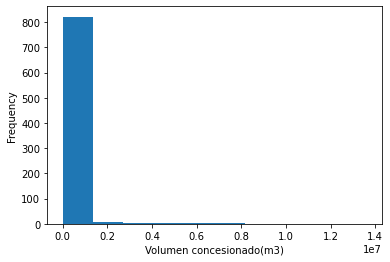

In [7]:
d = bd1['(7) VOLUMEN CONCESIONADO PARA EL AÑO REPORTADO M3'].plot.hist()
d.set_xlabel('Volumen concesionado(m3)')
d

# Histograma "Volumen captado"

<AxesSubplot:xlabel='Volumen captado(m3)', ylabel='Frequency'>

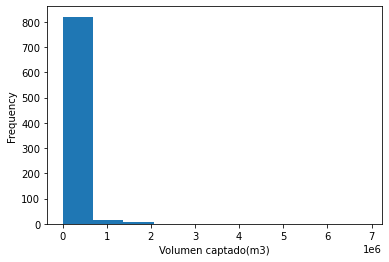

In [8]:
d1 = bd1['(8) VOLUMEN CAPTADO PARA EL AÑO REPORTADO M3'].plot.hist()
d1.set_xlabel('Volumen captado(m3)')
d1

# Diagrama de ojiva "Volumen concesionado"

In [9]:
bd2 = bd1[['(8) VOLUMEN CAPTADO PARA EL AÑO REPORTADO M3','(7) VOLUMEN CONCESIONADO PARA EL AÑO REPORTADO M3']]

In [10]:
x= bd2['(8) VOLUMEN CAPTADO PARA EL AÑO REPORTADO M3']
x.reset_index(drop=True)

0       69063.84
1        1075.37
2        2995.92
3      144670.00
4        1765.92
         ...    
840      2522.88
841     73794.24
842     74166.36
843     15452.64
844     49196.16
Name: (8) VOLUMEN CAPTADO PARA EL AÑO REPORTADO M3, Length: 845, dtype: float64

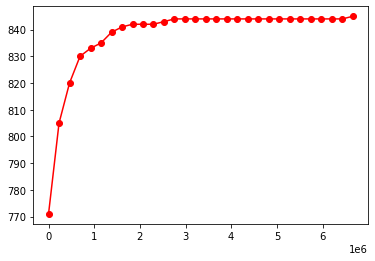

In [11]:
valores,base = np.histogram (x, bins = 30 )
acumulativo = np.cumsum (valores)
plot.plot(base [: - 1], acumulativo, 'ro-')

# Diagrama de ojiva "Volumen captado"

In [12]:
x1= bd2['(7) VOLUMEN CONCESIONADO PARA EL AÑO REPORTADO M3']
x1.reset_index(drop=True)

0        69063.84
1          946.08
2         2838.24
3      2365200.00
4         1576.80
          ...    
840       2522.88
841      73794.24
842      74109.60
843      15452.64
844      49196.16
Name: (7) VOLUMEN CONCESIONADO PARA EL AÑO REPORTADO M3, Length: 845, dtype: float64

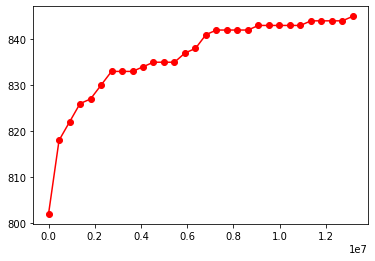

In [13]:
valores,base = np.histogram (x1, bins = 30 )
acumulativo = np.cumsum (valores)
plot.plot(base [: - 1], acumulativo, 'ro-')

# MÉTRICAS ESTADÍSTICAS

# Metricas estadisticas "Volumen concesionado"

In [14]:
media=bd1['(7) VOLUMEN CONCESIONADO PARA EL AÑO REPORTADO M3'].mean()
mediana=bd1['(7) VOLUMEN CONCESIONADO PARA EL AÑO REPORTADO M3'].median()
moda=bd1['(7) VOLUMEN CONCESIONADO PARA EL AÑO REPORTADO M3'].mode()
rango=bd1['(7) VOLUMEN CONCESIONADO PARA EL AÑO REPORTADO M3'].max()-bd1['(7) VOLUMEN CONCESIONADO PARA EL AÑO REPORTADO M3'].min()
riq = bd1['(7) VOLUMEN CONCESIONADO PARA EL AÑO REPORTADO M3'].quantile(.75)-bd1['(7) VOLUMEN CONCESIONADO PARA EL AÑO REPORTADO M3'].quantile(.25)
varianza=bd1['(7) VOLUMEN CONCESIONADO PARA EL AÑO REPORTADO M3'].var()
desviacion=bd1['(7) VOLUMEN CONCESIONADO PARA EL AÑO REPORTADO M3'].std()
cv = ss.variation(bd1["(7) VOLUMEN CONCESIONADO PARA EL AÑO REPORTADO M3"])
asimetria = ss.skew(bd1["(7) VOLUMEN CONCESIONADO PARA EL AÑO REPORTADO M3"])

In [15]:
print("Media:",media)
print("Mediana:",mediana)
print("Moda:",moda)
print("Rango:",rango)
print("RIQ:",riq)
print("Varianza:",varianza)
print("Desviacion tipica:",desviacion)
print("Coeficiente de variacion:",cv)
print("Asimetria:",asimetria)

Media: 196319.39188449687
Mediana: 21759.84
Moda: 0    9460.8
dtype: float64
Rango: 13624781.879999999
RIQ: 58026.240000000005
Varianza: 952169224209.2908
Desviacion tipica: 975791.5885112408
Coeficiente de variacion: 4.967486995301381
Asimetria: 8.793245182785839


# Metricas estadisticas "Volumen captado"

In [16]:
media1=bd1['(8) VOLUMEN CAPTADO PARA EL AÑO REPORTADO M3'].mean()
mediana1=bd1['(8) VOLUMEN CAPTADO PARA EL AÑO REPORTADO M3'].median()
moda1=bd1['(8) VOLUMEN CAPTADO PARA EL AÑO REPORTADO M3'].mode()
rango1=bd1['(8) VOLUMEN CAPTADO PARA EL AÑO REPORTADO M3'].max()-bd1['(8) VOLUMEN CAPTADO PARA EL AÑO REPORTADO M3'].min()
riq1 = bd1['(8) VOLUMEN CAPTADO PARA EL AÑO REPORTADO M3'].quantile(.75)-bd1['(8) VOLUMEN CAPTADO PARA EL AÑO REPORTADO M3'].quantile(.25)
varianza1=bd1['(8) VOLUMEN CAPTADO PARA EL AÑO REPORTADO M3'].var()
desviacion1=bd1['(8) VOLUMEN CAPTADO PARA EL AÑO REPORTADO M3'].std()
cv1 = ss.variation(bd1["(8) VOLUMEN CAPTADO PARA EL AÑO REPORTADO M3"])
asimetria1 = ss.skew(bd1["(8) VOLUMEN CAPTADO PARA EL AÑO REPORTADO M3"])

In [17]:
print("Media:",media1)
print("Mediana:",mediana1)
print("Moda:",moda1)
print("Rango:",rango1)
print("RIQ:",riq1)
print("Varianza:",varianza1)
print("Desviacion tipica:",desviacion1)
print("Coeficiente de variacion:",cv1)
print("Asimetria:",asimetria1)

Media: 98834.27965680473
Mediana: 21926.98
Moda: 0    9460.8
dtype: float64
Rango: 6893706.6
RIQ: 57641.58
Varianza: 113710729856.85078
Desviacion tipica: 337210.2161217106
Coeficiente de variacion: 3.409855624499957
Asimetria: 11.994520505817281


# ANÁLISIS BIVARIADO

# Gráfica de correlación

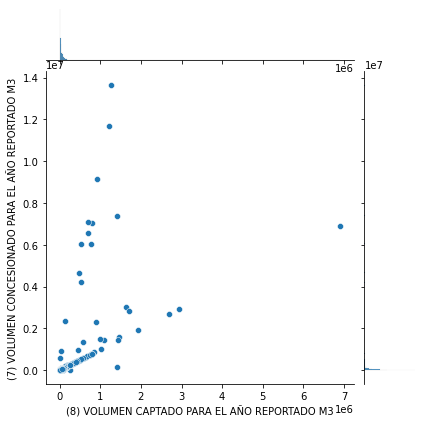

In [18]:
sns.jointplot(x="(8) VOLUMEN CAPTADO PARA EL AÑO REPORTADO M3", y="(7) VOLUMEN CONCESIONADO PARA EL AÑO REPORTADO M3", data=bd2)

# Coeficiente de correlacion

In [19]:
print('Coeficiente de Correlacion: ', bd2['(8) VOLUMEN CAPTADO PARA EL AÑO REPORTADO M3'].corr(bd2['(7) VOLUMEN CONCESIONADO PARA EL AÑO REPORTADO M3']))


Coeficiente de Correlacion:  0.5832455709813635


# Coeficiente de determinacion

In [20]:
a =  bd2['(8) VOLUMEN CAPTADO PARA EL AÑO REPORTADO M3'].corr(bd2['(7) VOLUMEN CONCESIONADO PARA EL AÑO REPORTADO M3'], method='pearson')
Coeficiente_determinacion = a*a
print('Coeficiente de determinacion:',Coeficiente_determinacion)

Coeficiente de determinacion: 0.34017539606937675


# Matriz de covarianza

In [21]:
covarianza = np.cov(x,x1)
covarianza

array([[1.13710730e+11, 1.91915143e+11],
       [1.91915143e+11, 9.52169224e+11]])

# ANALISIS CUALITATIVO

# Distribucion de frecuencia "Actividad economica"

In [22]:
bdac=bd1.groupby("ACTIVIDAD ECONOMICA")
bdtac2=bdac.agg(frequency=("ACTIVIDAD ECONOMICA", "count"))
bdtac2

,frequency
ACTIVIDAD ECONOMICA,
Actividades artísticas; de entretenimiento y recreación,6
Agricultura; ganadería; caza; silvicultura y pesca.,415
Agricultura; ganadería; caza; silvicultura y pesca.Explotación de Minas y Canteras,1
Domestico,179
Domestico Agricultura; ganadería; caza; silvicultura y pesca.,187
Domestico Agricultura; ganadería; caza; silvicultura y pesca. Actividades artísticas; de entretenimiento y recreación,1
Domestico Agricultura; ganadería; caza; silvicultura y pesca. Industrias Manufactureras,2
Domestico Industrias Manufactureras,9
Domestico Suministro de electricidad; gas; vapor y aire acondicionado.,1


# Distribucion de frecuencia "Nombre de la fuente"

In [23]:
bdnf=bd1.groupby("(11) NOMBRE DE LA FUENTE")
bdnf2=bdnf.agg(frequency=("(11) NOMBRE DE LA FUENTE", "count"))
bdnf2

,frequency
(11) NOMBRE DE LA FUENTE,
AGUA FRIA,1
AGUA TIBIA - PAIPA,1
AGUAS LLUVIA Y ESCORRENTIA - AGUA BLANCA,2
AGUAS LLUVIAS,2
AGUAS LLUVIAS YESCORRENTIA -RUNTA ABAJO,1
...,...
TOMA TENZA,1
TOMAS EL ONCHE Y LAS MARGARITAS,1
TOROYUTA,1


# Diagrama de barras "Actividad economica"

In [24]:
bdtac3=bd1.groupby('ACTIVIDAD ECONOMICA').size().reset_index(name='n').sort_values(by='n', ascending=False).reset_index(drop=True)
bdtac3

,ACTIVIDAD ECONOMICA,n
0,Agricultura; ganadería; caza; silvicultura y p...,415
1,Domestico Agricultura; ganadería; caza; silvic...,187
2,Domestico,179
3,Industrias Manufactureras,43
4,Domestico Industrias Manufactureras,9
5,Actividades artísticas; de entretenimiento y r...,6
6,Domestico Agricultura; ganadería; caza; silvic...,2
7,Agricultura; ganadería; caza; silvicultura y p...,1
8,Domestico Agricultura; ganadería; caza; silvic...,1
9,Domestico Suministro de electricidad; gas; vap...,1


<AxesSubplot:xlabel='ACTIVIDAD ECONOMICA'>

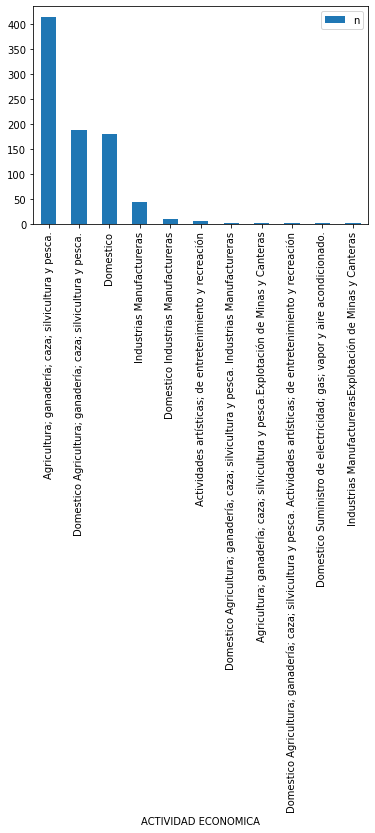

In [25]:
bdtac3.plot(kind='bar',x='ACTIVIDAD ECONOMICA',y='n')

# Diagrama de barras "Nombre de la fuente"

In [26]:
bdnf2=bd1.groupby('(11) NOMBRE DE LA FUENTE').size().reset_index(name='n').sort_values(by='n', ascending=False).reset_index(drop=True)
bdnf2

,(11) NOMBRE DE LA FUENTE,n
0,NACIMIENTO N.N,45
1,POZO PROFUNDO,37
2,RIO CHICAMOCHA,36
3,RIO DE PIEDRAS,22
4,RIO PESCA,20
...,...,...
514,NACIMIENTO LA AURORA,1
515,NACIMIENTO LA AGUADITA,1
516,NACIMIENTO JOSE APONTE,1
517,NACIMIENTO HOYO NEGRO,1


<AxesSubplot:xlabel='(11) NOMBRE DE LA FUENTE'>

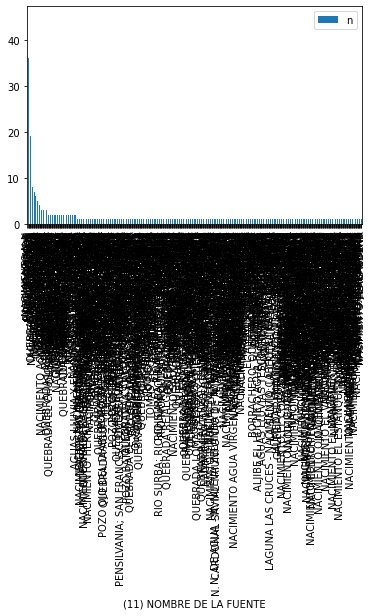

In [27]:
bdnf2.plot(kind='bar',x='(11) NOMBRE DE LA FUENTE',y='n')

# Diagrama de Pie "Actividad economica"

<AxesSubplot:ylabel='n'>

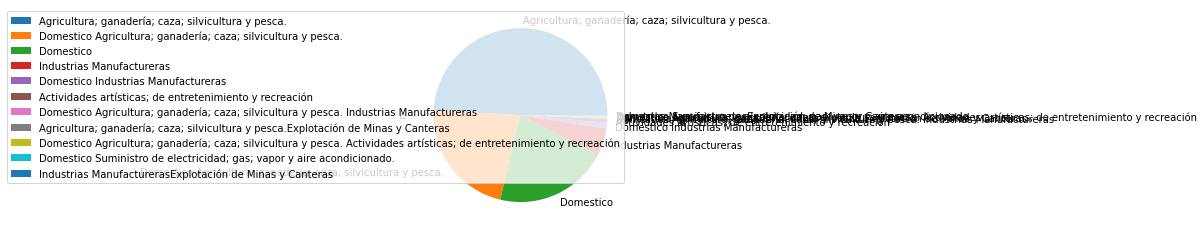

In [28]:
bdtac3.plot.pie(y='n',labels=bdtac3['ACTIVIDAD ECONOMICA'])

# Diagrama de Pie "Nombre de la fuente"

<AxesSubplot:ylabel='n'>

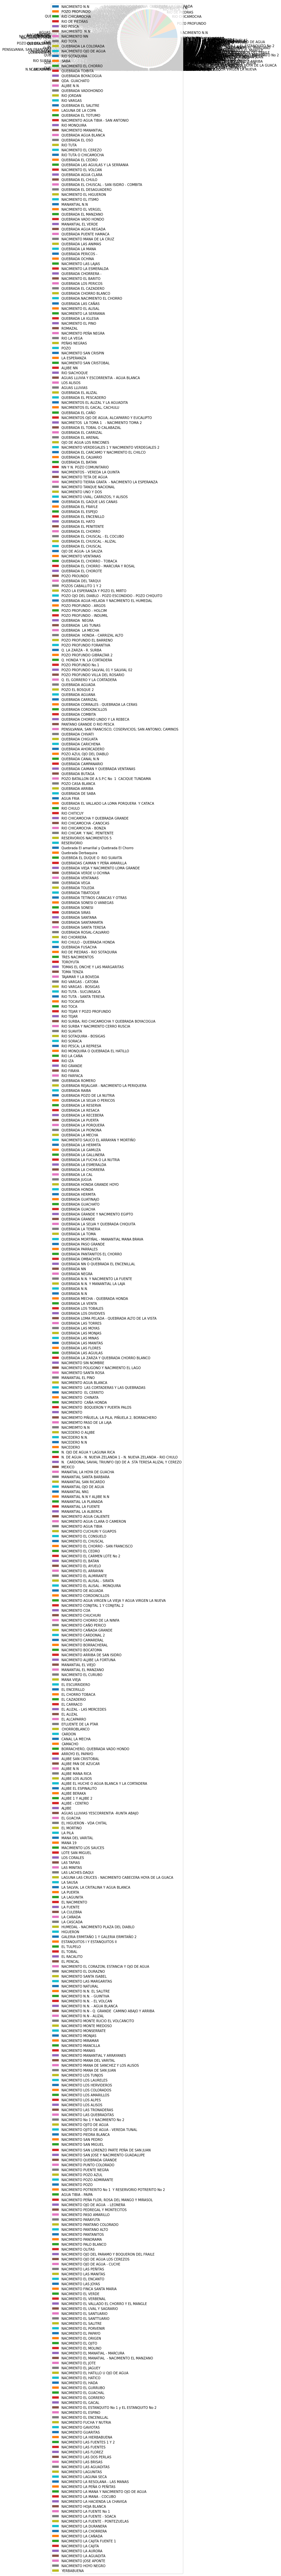

In [29]:
bdnf2.plot.pie(y='n',labels=bdnf2['(11) NOMBRE DE LA FUENTE'])

# PRUEBA DE HIPOTESIS

Se tomarán las variables que anteriormente se venían trabajando, estas son, "Volumen captado para el año reportado(2018) en M3" y "Volumen concesionado para el año reportado(2018) en M3"
Las medias y las desviaciones estandar para realizar el análsiis serán las obtenidas anteriormente, los tamaños de la muestra támbien seran el total de datos en la base de datos.

In [30]:
n1=bd1["(7) VOLUMEN CONCESIONADO PARA EL AÑO REPORTADO M3"].drop_duplicates().count()
n1

377

In [31]:
n2=bd1["(8) VOLUMEN CAPTADO PARA EL AÑO REPORTADO M3"].drop_duplicates().count()
n2

618

In [32]:
S = 0.05

In [33]:
a1=(desviacion1*desviacion1)/(n2)
b1=(desviacion*desviacion)/(n1)

* Media del "volumen captado" = media1(anteriormente calculada)
* Media del "volumen concesionado" = media(anteriormente calculada)
* Desviación estandar del "volumen concesionado" = desviación(anteriormente calculada)
* Desviación estandar del "volumen captado" = desviación1(anteriormente calculada)
* n1 = tamaño de muestra en "volumen concesionado"
* n2 = tamaño de muestra en "volumen captado"
* H0 = hipotesis nula "volumen captado"<="volumen concesionado"
* Ha = hipotesis alternativa "volumen captado" > "volumen concesionado"
* S = significancia del 5% o 0.05
* Z : z(para la S escogida) en la tabla de distribucion normal = 1.6

In [34]:
Z = (media1-media)/(a1+b1)**(1/2)
Z

-1.8727596235514175

Como Z es menor a S rechazaremos la hipotesis alternativa y aceptaremos la hipotesis nula

# CONCLUSIONES

Brayan Eduardo Quitian Quiroga: En el analisis cuantitativo se observa que la relacion de las columnas seleccionadas(Volumen captado vs Volumen concesionado) existe una relacion esto se puede analizar tanto en el valor del coeficiente de correlacion,que no se acerca a 1(lo cual indicaría una fuerte relacion) como en la grafica de correlacion en la cual se ve mucha dispersion y ni. En el apartado del analisis cuantitativo se observa que no hay existe solo una fuente hidrica que suministre el recurso,por esto tanto la grafica de barras y el pie poseen tantas  categorias, mientras que en la actividad economica si se observa un gran diferencia entre el sector ganadero/agricultor respecto a los otros sectores(se puede ver en ambas graficas)debido a que este sector demanda mucha agua para la crianza de animales o el cultivo de alimentos